In [1]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_state_city, plot_state_hinton

import numpy as np

import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

pi = np.pi
shots = 10000

## BELL STATES

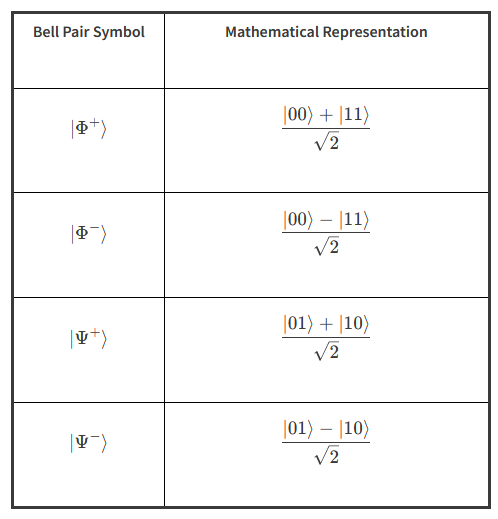

Bell states are maximally entangled states.

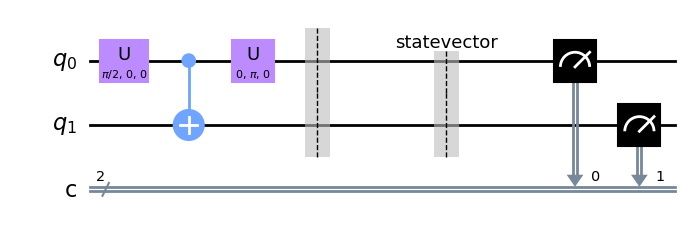

In [2]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')

Bell_circuit = QuantumCircuit(qr,cr)
qasm = Aer.get_backend('aer_simulator')

Bell_circuit.u(pi/2,0,0,qr[0])
Bell_circuit.cx(qr[0],qr[1])
#Bell_circuit.u(pi,0,pi,qr[0])
#Bell_circuit.u(0,pi/2,pi/2,qr[1])
Bell_circuit.u(0,pi,0,qr[0])

Bell_circuit.barrier()

Bell_circuit.save_statevector()
# !!! Usually there is a problem calling save_statevector() if 'aer_simulator' has not been called before.
Bell_circuit.measure(qr,cr)

Bell_circuit.draw('mpl')

In [3]:
qasm_job = qasm.run(circuits = Bell_circuit, shots = shots)

{'11': 5050, '00': 4950}
(4, 1)
[[ 0.5 -0.   0.  -0.5]
 [-0.   0.  -0.   0. ]
 [ 0.  -0.   0.  -0. ]
 [-0.5  0.  -0.   0.5]]


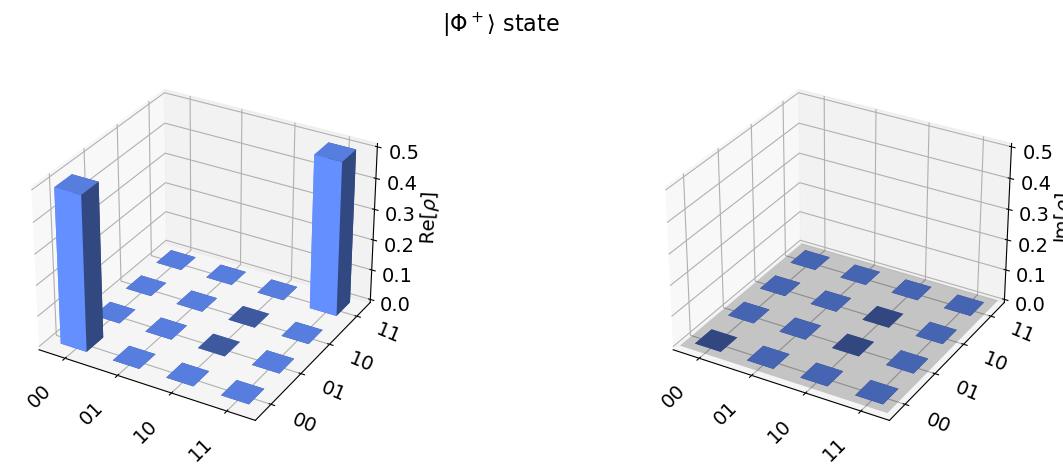

In [4]:
np.set_printoptions(precision=3)
print(qasm_job.result().get_counts())
qasm_statevec = qasm_job.result().get_statevector(Bell_circuit)
print(np.shape(np.array([qasm_statevec]).transpose()))
print(np.round(np.real(np.dot(np.array([qasm_statevec]).transpose(),np.array([qasm_statevec]))), decimals = 3))
plot_state_city(qasm_statevec, title = r'$| \Phi^+ \rangle$ state')

In [5]:
qasm_statevec.draw('latex')

<IPython.core.display.Latex object>

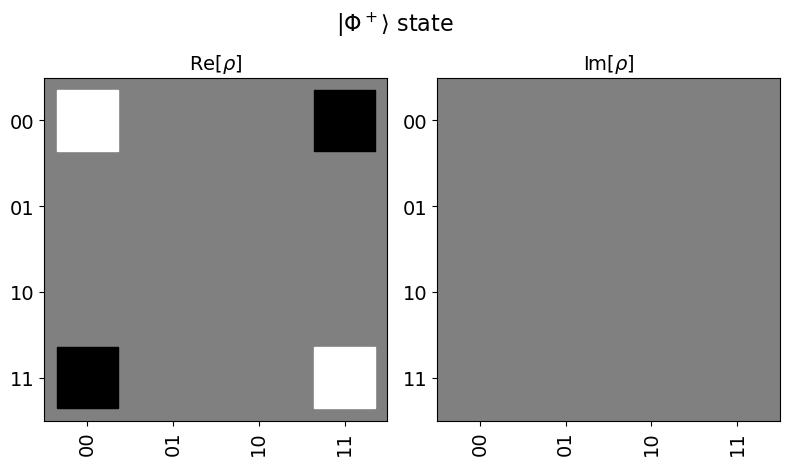

In [138]:
plot_state_hinton(qasm_statevec, title = r'$| \Phi^+ \rangle$ state')

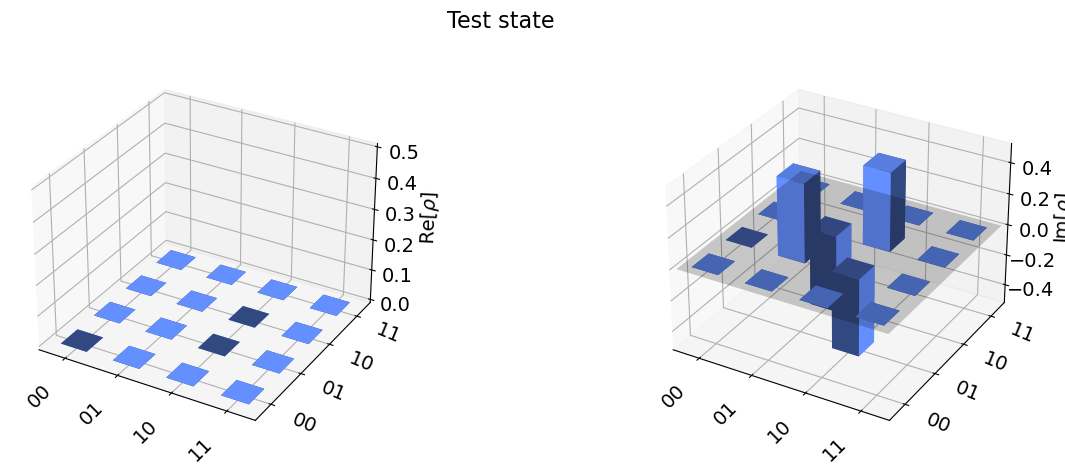

In [213]:
# Testing plot_state_city:

psi = np.array([[0.,  0.,  0., 0.],
       [0.,  0.5j, -0.5j, 0.],
       [0., -0.5j,  0.5j, 0.],
       [0.,  0.,  0., 0.]])

plot_state_city(psi, title = 'Test state')

# !!! plot_state_city fails when plotting real part with negative values.

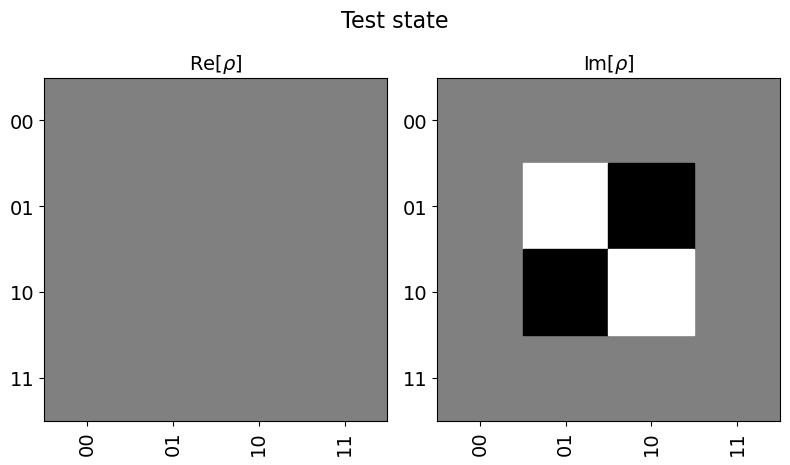

In [129]:
plot_state_hinton(psi, title = 'Test state')

In [7]:
def Bell_circuit(state = 'phi_plus'):
    
    if state not in ('phi_plus', 'phi_min', 'psi_plus', 'psi_min'):
        raise Exception('Bell state identifier not recognised')
    else:
        qr = QuantumRegister(2)
        cr = ClassicalRegister(2)
        
        Bell_circuit = QuantumCircuit(qr,cr)
        qasm = Aer.get_backend('aer_simulator')
        
        Bell_circuit.u(pi/2,0,0,qr[0])
        Bell_circuit.cx(qr[0], qr[1])
        
        if state == 'phi_min':
            Bell_circuit.u(0,pi,0,qr[0])
        elif state == 'psi_plus':
            Bell_circuit.u(pi,0,pi,qr[0])
        elif state == 'psi_min':
            Bell_circuit.u(pi,0,pi,qr[0])
            Bell_circuit.u(0,pi,0,qr[0])
        
        Bell_circuit.barrier()
        
        Bell_circuit.save_statevector()
        
        Bell_circuit.measure(qr,cr)
        
        return Bell_circuit, qasm

def do_job(circuit, qasm, shots = 1024, verbose = True):
    try:
        job = qasm.run(circuits = circuit, shots = shots)
        
        if verbose:
            np.set_printoptions(precision=3)
            print(job.result().get_counts())
            job_statevec = job.result().get_statevector(circuit)
            job_density_matrix = np.dot(np.array([job_statevec]).transpose(),np.array([job_statevec]))
            
            print('\n')
            print('Density Matrix Real part: ')
            print(np.round(np.real(job_density_matrix), decimals = 3))
            print('\n')
            print('Density Matrix Imaginary part: ')
            print(np.round(np.imag(job_density_matrix), decimals = 3))
            print('\n')
            
            return job, job_statevec, job_density_matrix
        
    except:
        print('Error during execution')
        

In [17]:
circuit, qasm = Bell_circuit('psi_plus')

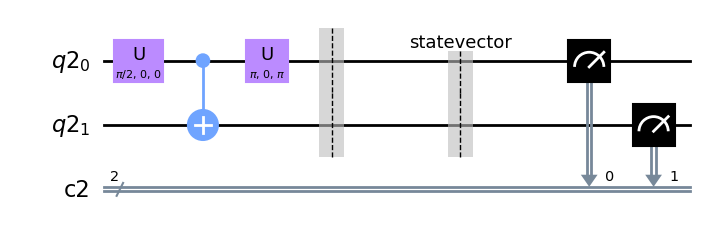

In [18]:
circuit.draw('mpl')

In [19]:
job, job_statevec, job_density_matrix = do_job(circuit, qasm, shots = 10000)

{'01': 5012, '10': 4988}


Density Matrix Real part: 
[[ 0.   0.   0.  -0. ]
 [ 0.   0.5  0.5 -0. ]
 [ 0.   0.5  0.5 -0. ]
 [-0.  -0.  -0.   0. ]]


Density Matrix Imaginary part: 
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0. -0.  0.]
 [ 0.  0.  0. -0.]]




In [20]:
job_statevec.draw('latex')

<IPython.core.display.Latex object>

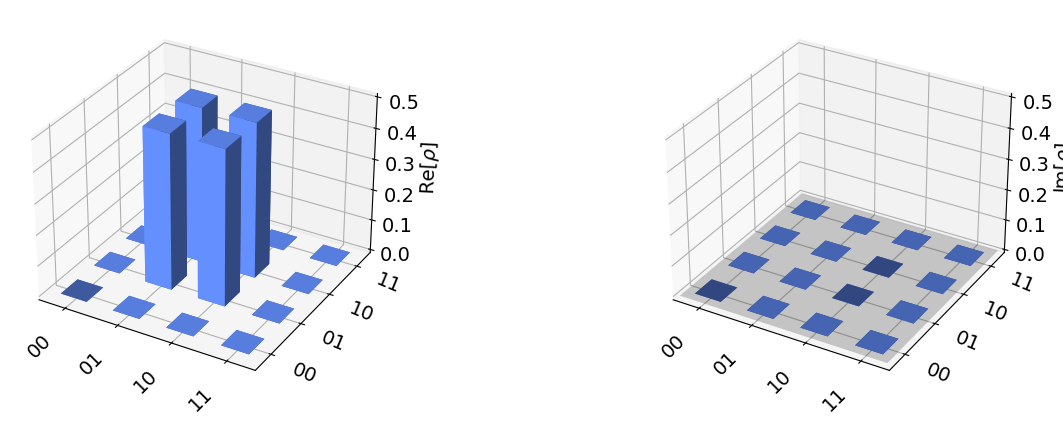

In [21]:
plot_state_city(job_density_matrix)

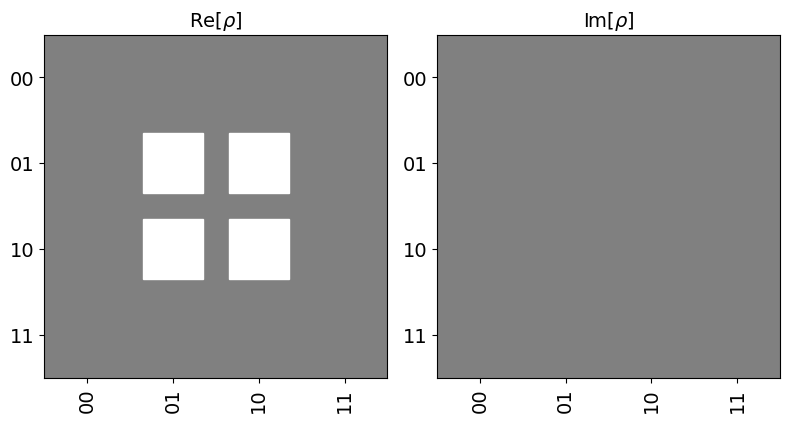

In [22]:
plot_state_hinton(job_density_matrix)

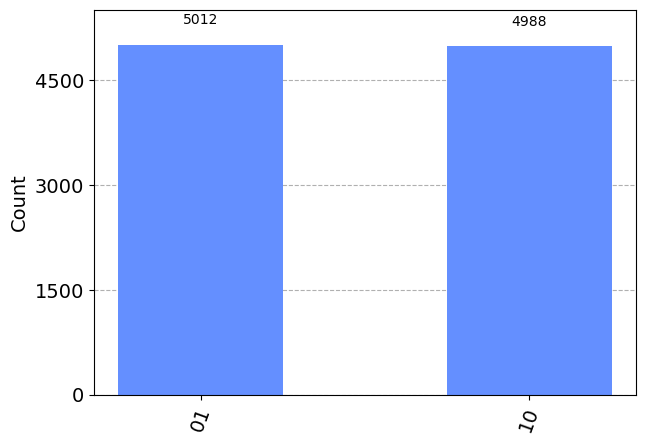

In [23]:
plot_histogram(job.result().get_counts())

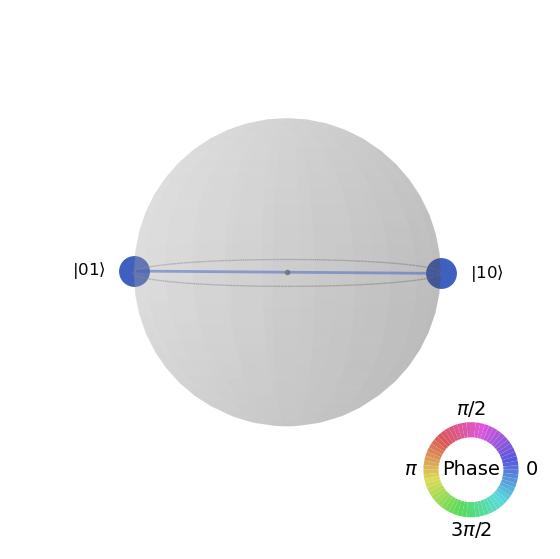

In [24]:
plot_state_qsphere(job_density_matrix)

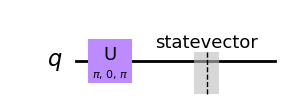

In [12]:
q = QuantumRegister(1,'q')
test = QuantumCircuit(q)
test.u(pi,0,pi,q)

qasm = Aer.get_backend('aer_simulator')
test.save_statevector()

test.draw('mpl')



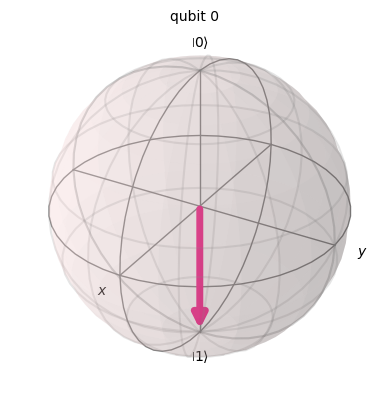

In [15]:
test_job = qasm.run(circuits = test, shots = shots)
test_state = test_job.result().get_statevector()

from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(test_state)